In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
batch_size = 5
trdata = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')
traindata = trdata.flow_from_directory(directory="teeth_dataset/training",target_size=(224,224),batch_size = batch_size)
tsdata = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')
testdata = tsdata.flow_from_directory(directory="teeth_dataset/test", target_size=(224,224),batch_size = batch_size)

Found 60 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [37]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)
print(tsdata)

In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [6]:
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(vggmodel.input, predictions)

In [7]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model_final.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

C:\Env\envs\intSYS\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
traindata.class_indices

{'caries': 0, 'without_caries': 1}

In [9]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq="epoch")
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')


In [32]:
model_final.fit(traindata, steps_per_epoch= len(traindata), epochs= 30, validation_data= testdata, validation_steps=1, callbacks=[checkpoint])


Epoch 1/30
12/12 [==============================] - 12s 1s/step - loss: 0.0769 - accuracy: 0.9667 - val_loss: 0.1406 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to vgg16_1.h5
Epoch 2/30
12/12 [==============================] - 13s 1s/step - loss: 0.0769 - accuracy: 0.9667 - val_loss: 0.1811 - val_accuracy: 0.8000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/30
12/12 [==============================] - 13s 1s/step - loss: 0.1169 - accuracy: 0.9667 - val_loss: 0.0639 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/30
12/12 [==============================] - 16s 1s/step - loss: 0.1675 - accuracy: 0.9333 - val_loss: 0.7347 - val_accuracy: 0.8000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/30
12/12 [==============================] - 17s 1s/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.5556 - val_accuracy: 0.8000

Epoch 00005: val_accuracy did not improve from

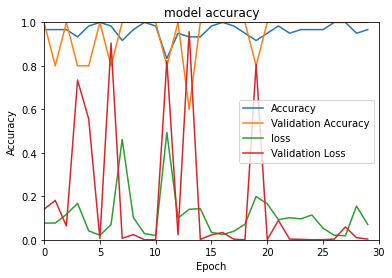

In [33]:
import matplotlib.pyplot as plt
plt.xlim(0,len(model_final.history.history["accuracy"]))
plt.ylim(0,1)
plt.plot(model_final.history.history["accuracy"])
plt.plot(model_final.history.history['val_accuracy'])
plt.plot(model_final.history.history['loss'])
plt.plot(model_final.history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

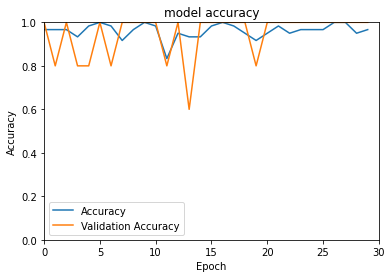

In [45]:
import matplotlib.pyplot as plt
plt.xlim(0,len(model_final.history.history["accuracy"]))
plt.ylim(0,1)
plt.plot(model_final.history.history["accuracy"])
plt.plot(model_final.history.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

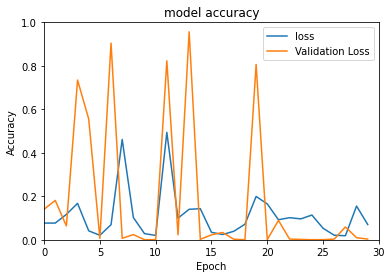

In [42]:
import matplotlib.pyplot as plt
plt.xlim(0,len(model_final.history.history["accuracy"]))
plt.ylim(0,1)
plt.plot(model_final.history.history['loss'])
plt.plot(model_final.history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [34]:
model_final.save("vgg16_2.h5")

Cavity


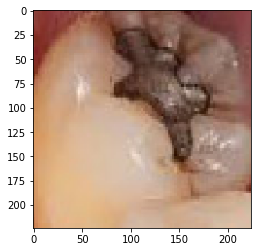

In [35]:
from keras.preprocessing import image
img = image.load_img("wc5.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_2.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Cavity")
else:
    print('no cavity')

0.0

1.0

No caries


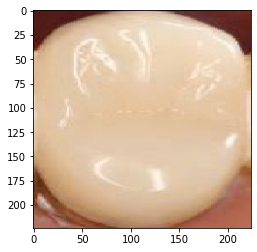

In [36]:
from keras.preprocessing import image
img = image.load_img("nc13.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
print(output[0][0])
print()
print(output[0][1])
print(saved_model)
print()
if output[0][0] > output[0][1]:
    print("Caries")
else:
    print('No caries')

1.0

0.0

Caries


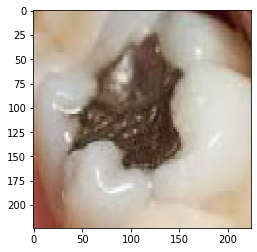

In [26]:
from keras.preprocessing import image
img = image.load_img("wc11.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
print(output[0][0])
print()
print(output[0][1])
print(saved_model)
print()
if output[0][0] > output[0][1]:
    print("Caries")
else:
    print('No caries')

1.0

0.0

Caries


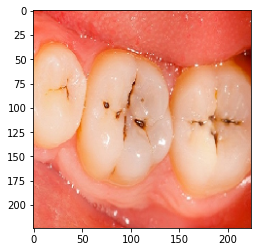

In [41]:
from keras.preprocessing import image
img = image.load_img("Tooth-Cavity.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
print(output[0][0])
print()
print(output[0][1])
print(saved_model)
print()
if output[0][0] > output[0][1]:
    print("Caries")
else:
    print('No caries')